In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.042365,NaN,NaN
1,-0.197608,NaN,NaN
2,1.362079,NaN,-0.675308
3,0.001976,NaN,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [16]:
df.fillna(0)

,0,1,2
0,-0.042365,0.000000,0.000000
1,-0.197608,0.000000,0.000000
2,1.362079,0.000000,-0.675308
3,0.001976,0.000000,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.042365,0.500000,0.000000
1,-0.197608,0.500000,0.000000
2,1.362079,0.500000,-0.675308
3,0.001976,0.500000,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [18]:
df.fillna(method="bfill")

C:\Users\potkd\AppData\Local\Temp\ipykernel_30148\3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,0,1,2
0,-0.042365,-0.376941,-0.675308
1,-0.197608,-0.376941,-0.675308
2,1.362079,-0.376941,-0.675308
3,0.001976,-0.376941,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [19]:
df.fillna(method="bfill", limit=2)

C:\Users\potkd\AppData\Local\Temp\ipykernel_30148\695793777.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", limit=2)


,0,1,2
0,-0.042365,NaN,-0.675308
1,-0.197608,NaN,-0.675308
2,1.362079,-0.376941,-0.675308
3,0.001976,-0.376941,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [20]:
df.fillna(data.mean())

,0,1,2
0,-0.042365,6.500000,3.000000
1,-0.197608,6.500000,3.000000
2,1.362079,6.500000,-0.675308
3,0.001976,6.500000,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


In [21]:
df.fillna(data.median())

,0,1,2
0,-0.042365,6.500000,3.000000
1,-0.197608,6.500000,3.000000
2,1.362079,6.500000,-0.675308
3,0.001976,6.500000,0.530907
4,-0.413553,-0.376941,-0.432906
5,-0.828018,1.056261,0.753728
6,-0.419830,-1.507782,-0.764510


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for j in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

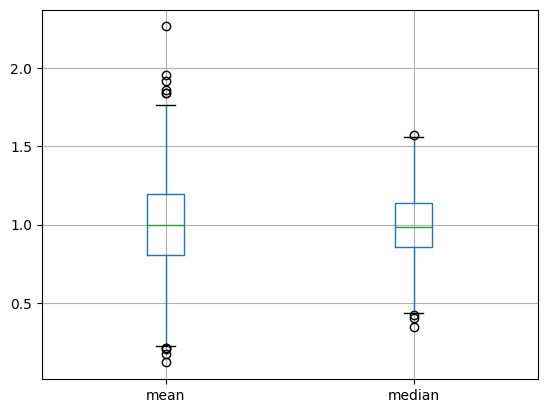

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.042365,NaN,NaN,1
1,-0.197608,NaN,NaN,1
2,1.362079,NaN,-0.675308,0
3,0.001976,NaN,0.530907,0
4,-0.413553,-0.376941,-0.432906,0
5,-0.828018,1.056261,0.753728,0
6,-0.419830,-1.507782,-0.764510,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

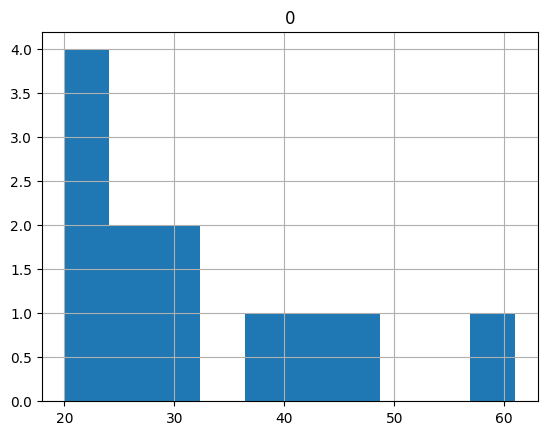

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\potkd\AppData\Local\Temp\ipykernel_30148\1334197304.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

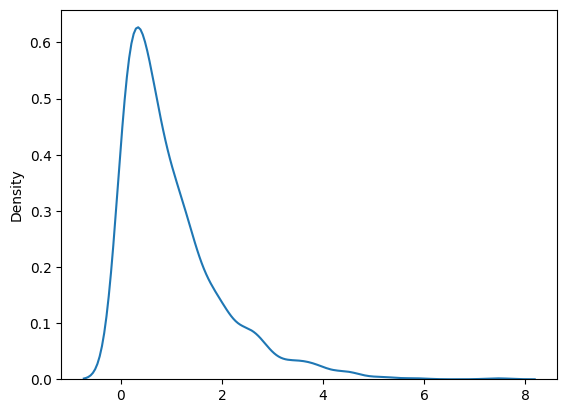

In [43]:
from scipy.stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\potkd\AppData\Local\Temp\ipykernel_30148\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

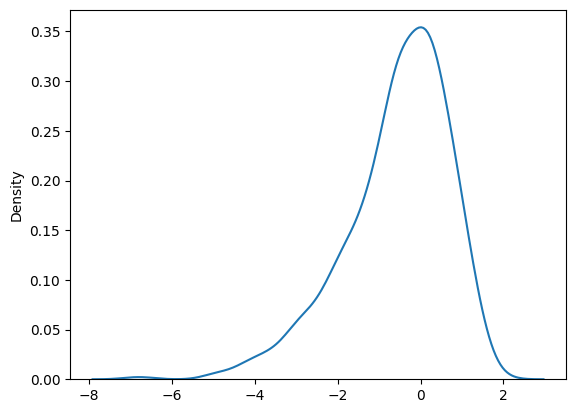

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\potkd\AppData\Local\Temp\ipykernel_30148\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

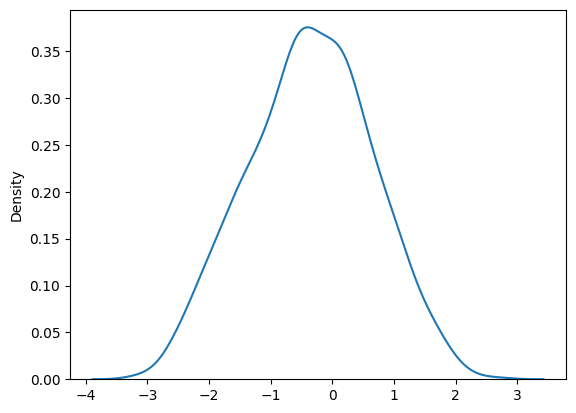

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2708492077428047

# Домашнее задание

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
df = df.drop('index', axis=1)
df

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,-1.0,34558,11.2,6.6,0,4,4,2004,2016,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,3,-1.0,38268,9.6,5.8,0,4,2,2013,2015,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,3,-1.0,8958,10.0,9.3,0,4,4,1991,1999,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,3,-1.0,20293,8.5,-1.0,0,5,4,2002,2004,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [50]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
base_train_X, base_test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
baseline_model = LinearRegression().fit(base_train_X, train_y)

In [52]:
baseline_model.score(base_train_X, train_y)

0.45548738550350754

In [53]:
mean_squared_error(baseline_model.predict(base_train_X), train_y)

29843.042074394027

In [54]:
scores = cross_validate(baseline_model, base_train_X, train_y, cv=3, 
                        scoring='neg_mean_squared_error')

In [55]:
scores

{'fit_time': array([0.02962732, 0.02214456, 0.03125453]),
 'score_time': array([0.0040009, 0.       , 0.       ]),
 'test_score': array([-29837.39503386, -29608.61474963, -30347.77862193])}

In [56]:
mean_squared_error(baseline_model.predict(base_test_X), test_y)

31015.753109119276

In [57]:
from sklearn.metrics import r2_score
r2_score(baseline_model.predict(base_test_X), test_y)

-0.20626076362487966

## Preprocessing

In [58]:
import seaborn as sns

In [59]:
df.describe()

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
count,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,...,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000
mean,4.273511,-0.875116,30684.557267,8.970296,4.290234,0.628512,4.576506,3.756481,1999.358377,1805.917748,...,3.049370,1.867014,12.964828,53.300937,1790.357267,18.434177,2.991421,0.002035,4.474783,2660.826246
std,2.929769,2.904357,17562.733960,6.148230,4.765435,1.230331,1.161683,1.720373,13.433605,594.453296,...,1.375937,0.350225,4.499009,24.845687,616.347148,9.541600,0.142150,0.045065,39.934808,236.315583
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1904.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1190.000000
25%,3.000000,-1.000000,15578.000000,8.500000,-1.000000,0.000000,4.000000,4.000000,1991.000000,1990.000000,...,1.000000,2.000000,13.000000,46.000000,1992.000000,10.000000,3.000000,0.000000,1.000000,2510.000000
50%,3.000000,-1.000000,30756.000000,9.800000,5.400000,0.000000,4.000000,4.000000,2001.000000,2002.000000,...,4.000000,2.000000,13.000000,58.000000,2002.000000,16.000000,3.000000,0.000000,1.000000,2640.000000
75%,8.000000,-1.000000,45793.000000,10.800000,8.000000,0.000000,6.000000,5.000000,2010.000000,2010.000000,...,4.000000,2.000000,13.000000,68.000000,2011.000000,26.000000,3.000000,0.000000,1.000000,2774.000000
max,10.000000,200.000000,61175.000000,23.500000,40.000000,6.000000,10.000000,8.000000,2021.000000,2019.000000,...,4.000000,2.000000,35.000000,166.000000,2021.000000,36.000000,3.000000,1.000000,658.000000,5885.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   back-suspension                 43245 non-null  int64  
 1   battery-capacity                43245 non-null  float64
 2   charge-time                     43245 non-null  int64  
 3   compression                     43245 non-null  float64
 4   consumption-mixed               43245 non-null  float64
 5   cylinders-order                 43245 non-null  int64  
 6   cylinders-value                 43245 non-null  int64  
 7   engine-feeding                  43245 non-null  int64  
 8   engine-start                    43245 non-null  int64  
 9   engine-stop                     43245 non-null  int64  
 10  engine-type                     43245 non-null  int64  
 11  gear-type                       43245 non-null  int64  
 12  luxury                          

In [61]:
for column in df.columns:
    print(column, df[column].nunique())

back-suspension 11
battery-capacity 75
charge-time 43212
compression 188
consumption-mixed 205
cylinders-order 7
cylinders-value 11
engine-feeding 9
engine-start 98
engine-stop 97
engine-type 5
gear-type 3
luxury 42703
max-speed 268
power-electro-kw 66
supply-system 5
valves 3006
valvetrain 5
weight 1610
configurations_auto-premiere 43227
configurations_back-wheel-base 450
configurations_front-brake 5
configurations_safety-rating 3
configurations_seats 34
configurations_tank-volume 110
supergen_year-stop 97
models_country-from 36
models_group 4
models_light-and-commercial 2
models_male 469
target 759


In [62]:
categorial_features = [
    'engine-type',
    'gear-type', 
    'supply-system', 
    'valvetrain', 
    'configurations_front-brake', 
    'configurations_safety-rating', 
    'models_group', 
    'models_light-and-commercial'
]

In [63]:
for_encoder_df = df[categorial_features]
df = df.drop(categorial_features, axis=1)
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
after_encoder_df = pd.DataFrame(ohe.fit_transform(for_encoder_df))

C:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
after_encoder_df.columns = ohe.get_feature_names_out()

In [65]:
after_encoder_df

,engine-type_0,engine-type_1,engine-type_2,engine-type_3,engine-type_4,gear-type_0,gear-type_1,gear-type_2,supply-system_0,supply-system_1,...,configurations_front-brake_4,configurations_safety-rating_0,configurations_safety-rating_1,configurations_safety-rating_2,models_group_0,models_group_1,models_group_2,models_group_3,models_light-and-commercial_0,models_light-and-commercial_1
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43241,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43242,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43243,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [66]:
df = pd.concat([df, after_encoder_df], axis=1)
df

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake_4,configurations_safety-rating_0,configurations_safety-rating_1,configurations_safety-rating_2,models_group_0,models_group_1,models_group_2,models_group_3,models_light-and-commercial_0,models_light-and-commercial_1
0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,-1.0,34558,11.2,6.6,0,4,4,2004,2016,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43241,3,-1.0,38268,9.6,5.8,0,4,2,2013,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43242,3,-1.0,8958,10.0,9.3,0,4,4,1991,1999,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43243,3,-1.0,20293,8.5,-1.0,0,5,4,2002,2004,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [67]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
class MyScaler:
    def __init__(self):
        pass

    def fit(self, train_X):
        train_X = train_X.replace(-1, np.nan) 
        median_dict = {}
        for column in train_X.columns:
            median_dict[column] = np.nanmedian(train_X[column])
        return median_dict

    def transform(self, test_X, median_dict):
        test_X = test_X.replace(-1, np.nan)
        for column in test_X.columns:
            test_X[column] = test_X[column].fillna(median_dict[column])
        return test_X
    
    def fit_transform(self, data):
        median_dict = self.fit(data)
        output_data = self.transform(data, median_dict)
        return output_data, median_dict
        

In [69]:
my_scaler = MyScaler()
my_train_X, median_dict = my_scaler.fit_transform(train_X)
my_test_X = my_scaler.transform(test_X, median_dict)

In [70]:
my_train_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake_4,configurations_safety-rating_0,configurations_safety-rating_1,configurations_safety-rating_2,models_group_0,models_group_1,models_group_2,models_group_3,models_light-and-commercial_0,models_light-and-commercial_1
22607,3,22.0,11636,9.5,7.4,0,4,4,1997,2000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
36531,8,22.0,31764,9.0,7.4,0,4,0,1990,1993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
24048,8,22.0,2773,8.8,6.8,0,4,4,2009,2012,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
34819,3,22.0,52039,14.0,5.3,0,4,5,2015,2017,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1328,3,22.0,20689,18.0,7.5,0,5,5,2004,2005,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6,22.0,42729,16.5,4.7,0,4,5,2017,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
11284,0,22.0,46093,8.1,7.4,3,7,0,1987,1990,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
38158,3,22.0,48819,10.0,7.6,0,4,2,2018,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
860,10,22.0,9346,22.4,7.4,0,4,6,1992,1995,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [71]:
my_test_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake_4,configurations_safety-rating_0,configurations_safety-rating_1,configurations_safety-rating_2,models_group_0,models_group_1,models_group_2,models_group_3,models_light-and-commercial_0,models_light-and-commercial_1
22894,10,22.0,6384,8.2,7.4,0,4,4,1984,1988,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
27055,10,22.0,5682,10.1,7.4,0,6,0,1977,1982,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
40027,8,22.0,15790,9.5,5.5,0,4,4,2012,2014,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
41228,3,22.0,36828,10.1,7.4,0,3,4,1987,1993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
20814,3,22.0,39082,10.5,7.4,0,4,2,2004,2008,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37121,3,22.0,12328,10.0,8.7,0,4,4,1990,1995,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
32691,3,22.0,47912,9.1,7.3,0,4,0,1989,1996,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
18009,3,22.0,23810,8.9,6.0,0,4,4,2003,2009,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3254,3,22.0,23486,10.0,7.4,1,4,4,2002,2006,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [72]:
my_reg = LinearRegression().fit(my_train_X, train_y)
r2_score(my_reg.predict(my_test_X), test_y), my_reg.score(my_test_X, test_y)

(0.31541726912022927, 0.6001284974816234)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [74]:
ridge_params = {
    'alpha': np.arange(0.5, 1.6, 0.01)
}

model_ridge = GridSearchCV(
    Ridge(),
    param_grid=ridge_params
).fit(train_X, train_y)
print(model_ridge.best_params_)
model_ridge = model_ridge.best_estimator_

{'alpha': 1.590000000000001}


In [75]:
model_ridge = model_ridge.fit(my_train_X, train_y)
r2_score(model_ridge.predict(my_test_X), test_y)

0.3151419117163865

In [76]:
poly = PolynomialFeatures(2)
train_poly_X = poly.fit_transform(my_train_X)
test_poly_X = poly.transform(my_test_X)

In [77]:
train_poly_X.shape

(28974, 1540)

In [78]:
reg_for_poly = LinearRegression().fit(train_poly_X, train_y)

In [79]:
r2_score(reg_for_poly.predict(train_poly_X), train_y), r2_score(reg_for_poly.predict(test_poly_X), test_y), reg_for_poly.score(test_poly_X, test_y)

(0.6147264325905749, 0.004418460497508714, -377.7375177689307)

In [80]:
r2_score(baseline_model.predict(base_test_X), test_y)

-0.20626076362487966

In [81]:
from sklearn.feature_selection import SelectKBest, f_regression

In [82]:
f_statistic, p_value = f_regression(train_poly_X, train_y)
selector = SelectKBest(f_regression, k=500)
best_k_train_X = pd.DataFrame(selector.fit_transform(train_poly_X, train_y), columns=selector.get_feature_names_out())
best_k_test_X = pd.DataFrame(selector.transform(test_poly_X), columns=selector.get_feature_names_out())

C:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
best_features_model = LinearRegression().fit(best_k_train_X, train_y)

In [84]:
r2_score(best_features_model.predict(best_k_test_X), test_y), best_features_model.score(best_k_test_X, test_y)

(0.580506606332704, 0.7035620400525104)

In [85]:
poly = PolynomialFeatures(2)
new_train_X = pd.DataFrame(poly.fit_transform(base_train_X), columns=poly.get_feature_names_out())
new_test_X = pd.DataFrame(poly.transform(base_test_X), columns=poly.get_feature_names_out())

In [86]:
new_model = LinearRegression().fit(new_train_X, train_y)
new_model.score(new_test_X, test_y)

0.689680112106875

### Примечание
1. Из категориальных признаков убрал <code>models_country-from</code> для экнодинга, так как с ним потом не хватает памяти для выделения под полиномиальные признаки.
2. Интересно, что без какой-либо предобработки данных, а только с полиномиальными признаками, получаем сопоставимое качество модели.

In [87]:
new_train_X, median_dict = my_scaler.fit_transform(new_train_X)
new_test_X = my_scaler.transform(new_test_X, median_dict)

In [88]:
new_model = LinearRegression().fit(new_train_X, train_y)
new_model.score(new_test_X, test_y)

0.6996805373311078

_Замена -1 существенного улучшения качества модели не приносит. Основной результат достигается за счет введения полиномиальных признаков. Энкодинг больше вредит, чем помогает, увеличивая размерность._